Student: Gabe Vazquez

    
Instructor: Jeff H


Date: March 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect

## Northwind Data

In [2]:
engine = create_engine("sqlite:///Northwind_small.sqlite", echo=True)
Session = sessionmaker(bind=engine)
session = Session()

In [3]:
inspector = inspect(engine)
print(inspector.get_table_names())

2019-03-21 07:10:15,927 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-03-21 07:10:15,929 INFO sqlalchemy.engine.base.Engine ()
2019-03-21 07:10:15,933 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-03-21 07:10:15,935 INFO sqlalchemy.engine.base.Engine ()
2019-03-21 07:10:15,937 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-03-21 07:10:15,938 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [4]:
#Given differnces in table names from scheme, check table columns
print((inspector.get_columns('Employee')))

2019-03-21 07:10:15,948 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Employee")
2019-03-21 07:10:15,949 INFO sqlalchemy.engine.base.Engine ()
[{'name': 'Id', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'LastName', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'FirstName', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'Title', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'TitleOfCourtesy', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'BirthDate', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'HireDate', 'type': VARCHAR(length=8000), 'nullable': True, 'default':

In [5]:
#Make table info more readable
def get_columns_info(col_name):
    cols_list = inspector.get_columns(col_name)
    
    print("Table Name: {}".format(col_name))
    print("")
    
    for column in cols_list:
        print("Name: {} \t Type: {}".format(column['name'], column['type']))

# Test 1 - Discounted vs. Everyday Value: Quantity

#### H0: Discounts have no effect on the amount of products customers buy

#### H1: Dicounts effect the amount of products customers buy

In [6]:
get_columns_info('OrderDetail')

2019-03-21 07:10:15,983 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("OrderDetail")
2019-03-21 07:10:15,984 INFO sqlalchemy.engine.base.Engine ()
Table Name: OrderDetail

Name: Id 	 Type: VARCHAR(8000)
Name: OrderId 	 Type: INTEGER
Name: ProductId 	 Type: INTEGER
Name: UnitPrice 	 Type: DECIMAL
Name: Quantity 	 Type: INTEGER
Name: Discount 	 Type: FLOAT


In [7]:
con = engine.connect()
rs = con.execute("SELECT * FROM OrderDetail")
df = pd.DataFrame(rs.fetchall())
df.columns = ['Id', 'OrderID', 'ProductID', 'UnitPrice', 'Quantity', 'Discount']
df.head()

2019-03-21 07:10:15,996 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail
2019-03-21 07:10:15,996 INFO sqlalchemy.engine.base.Engine ()


,Id,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderID      2155 non-null int64
ProductID    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [9]:
df.describe()

,OrderID,ProductID,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [10]:
no_discount_df = df.loc[df['Discount'] == 0]
no_discount_df.head()

,Id,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [11]:
discounted_df = df.loc[df['Discount'] > 0]
discounted_df.head()

,Id,OrderID,ProductID,UnitPrice,Quantity,Discount
6,10250/51,10250,51,42.4,35,0.15
7,10250/65,10250,65,16.8,15,0.15
8,10251/22,10251,22,16.8,6,0.05
9,10251/57,10251,57,15.6,15,0.05
11,10252/20,10252,20,64.8,40,0.05


In [12]:
df['OrderID'] = df['OrderID'].astype(object)

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


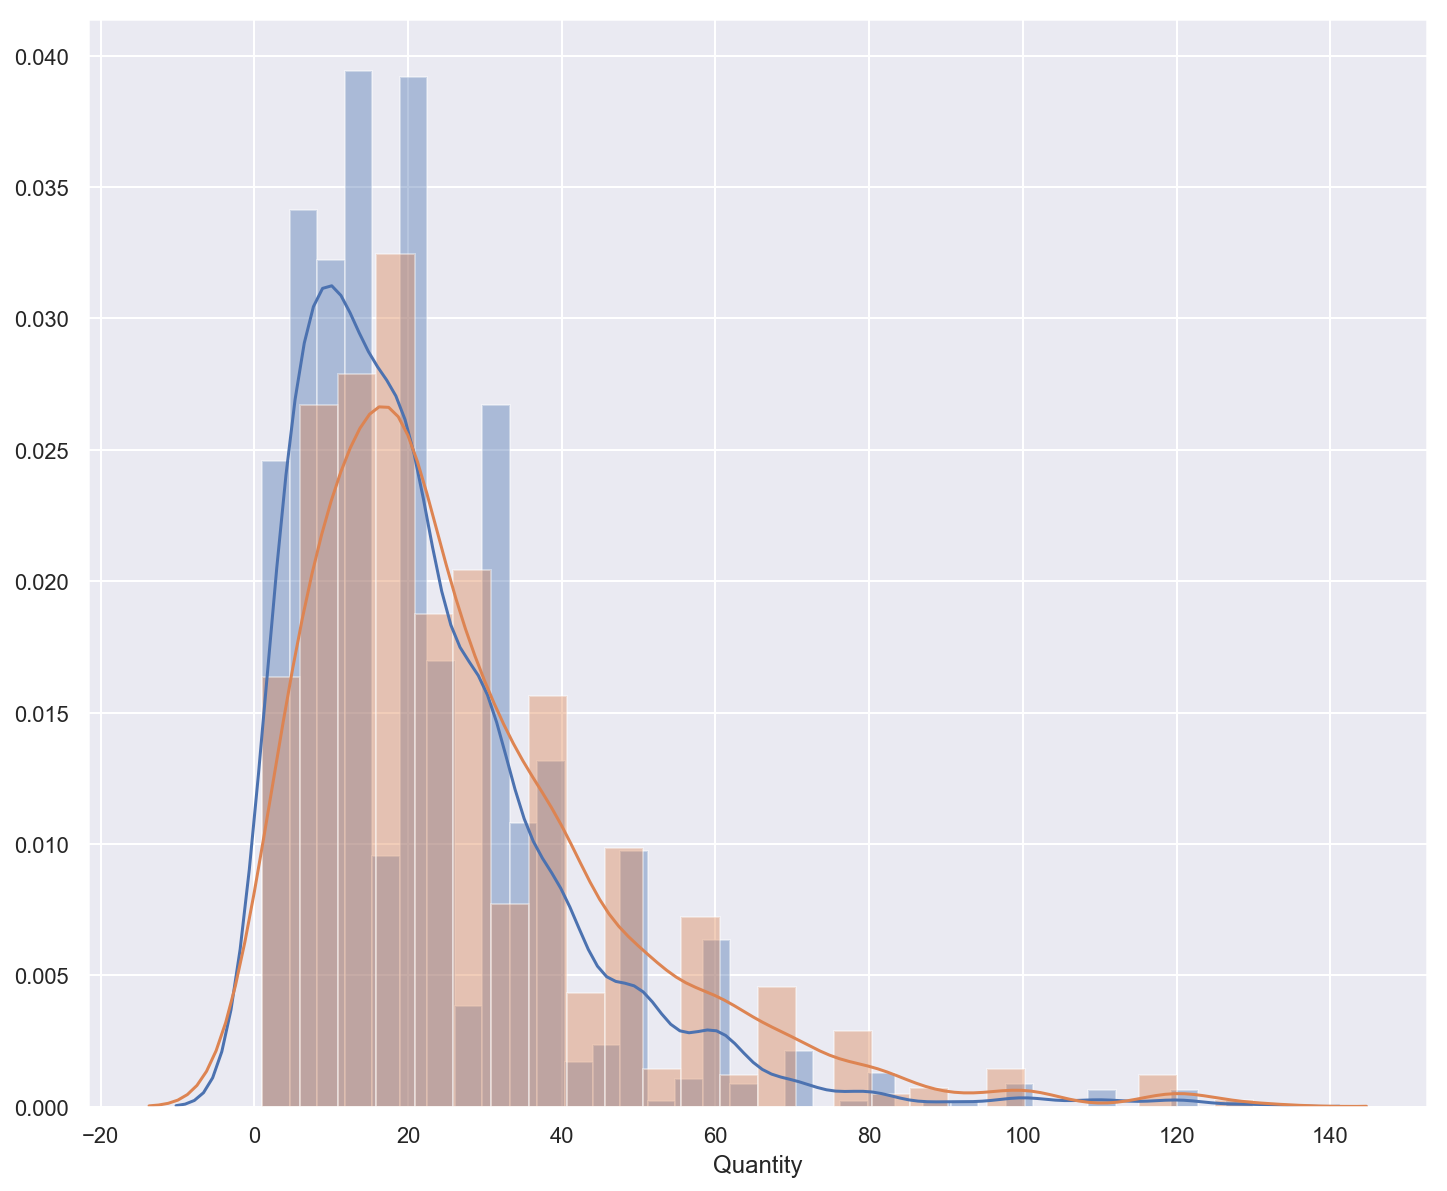

In [13]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(no_discount_df['Quantity']) #Blue
sns.distplot(discounted_df['Quantity']) #Red

So we are able to see some slight differences in the mean and standard deviation od control and experimental groups. This is a good sign to further our experimentation and to calculate whether the difference is significant, or not.

In [14]:
control_mean = no_discount_df['Quantity'].mean()
experimental_mean = discounted_df['Quantity'].mean()
print("Mean Difference: ", experimental_mean - control_mean)

Mean Difference:  5.394523243866239


In [15]:
import scipy.stats as stats
from scipy.stats import ttest_ind
#https://stackoverflow.com/questions/35583302/how-can-i-calculate-the-variance-of-a-list-in-python

In [16]:
t, p = ttest_ind(discounted_df['Quantity'], no_discount_df['Quantity'], equal_var=False)
print('T-Statisitc: ', t)
print('P-Value: ', p)

T-Statisitc:  6.239069142123973
P-Value:  5.65641429030433e-10


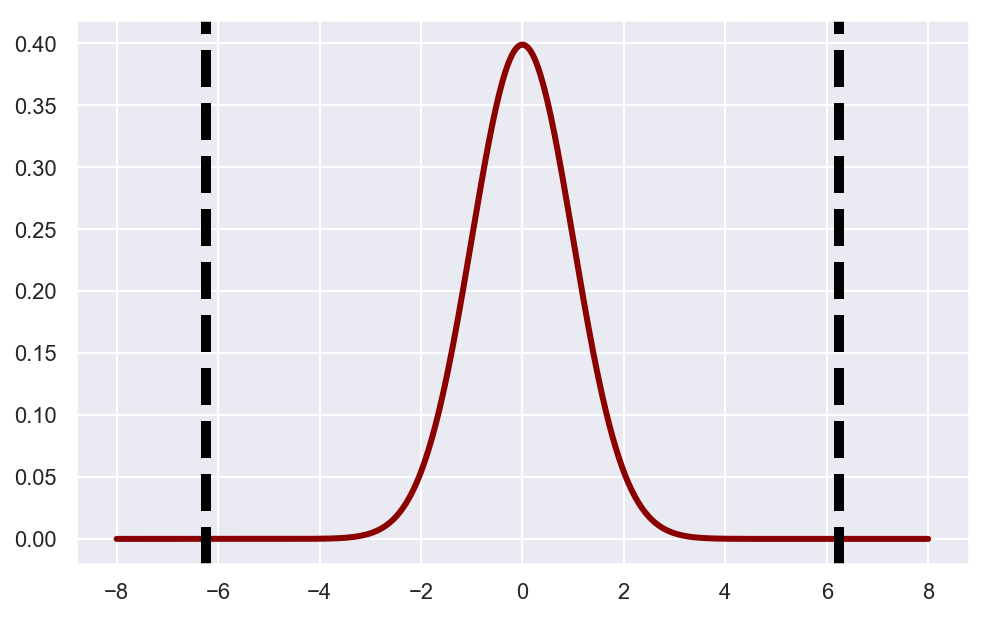

In [17]:
#Visualize the P-Value

def visualize_t(t, n_control, n_experimental):

    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-8, 8, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(t, color='black', linestyle='--', lw=5)
    ax.axvline(-t, color='black', linestyle='--', lw=5)
    
    confidence = 
    ax.axvline(-t, color='black', linestyle='--', lw=5)

    plt.show()
    return None

n_control = len(no_discount_df['Quantity'])
n_experimental = len(discounted_df['Quantity'])

visualize_t(t, n_control, n_experimental)


In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


df['Discount'] = df['Discount'].astype(object)


formula = 'Quantity ~ C(Discount)'

lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                    sum_sq      df         F        PR(>F)
C(Discount)   21258.403604    10.0  6.011811  4.704231e-09
Residual     758141.232591  2144.0       NaN           NaN


## Conclusion: Test 1 - Quantity

With a t-stat of 6.2 and a p-value of 5.6e-10 we can reject our null hypothesis and conclude that applying a discount creates a significant difference in the quantity of goods that are sold.

_____________________

# Test 2 - Discounted vs. Everyday Value: Revenue

#### H0: Discounts have no effect on revenue

#### H1: Dicounts effect the revenue

In [20]:
no_discount_df['Revenue'] = no_discount_df['UnitPrice'] * no_discount_df['Quantity']
discounted_df['Revenue'] = discounted_df['UnitPrice'] * discounted_df['Quantity'] * (1 - discounted_df['Discount'])

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
no_discount_df.head()

,Id,OrderID,ProductID,UnitPrice,Quantity,Discount,Revenue
0,10248/11,10248,11,14.0,12,0.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0
2,10248/72,10248,72,34.8,5,0.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0


In [22]:
discounted_df.head()

,Id,OrderID,ProductID,UnitPrice,Quantity,Discount,Revenue
6,10250/51,10250,51,42.4,35,0.15,1261.40
7,10250/65,10250,65,16.8,15,0.15,214.20
8,10251/22,10251,22,16.8,6,0.05,95.76
9,10251/57,10251,57,15.6,15,0.05,222.30
11,10252/20,10252,20,64.8,40,0.05,2462.40


/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


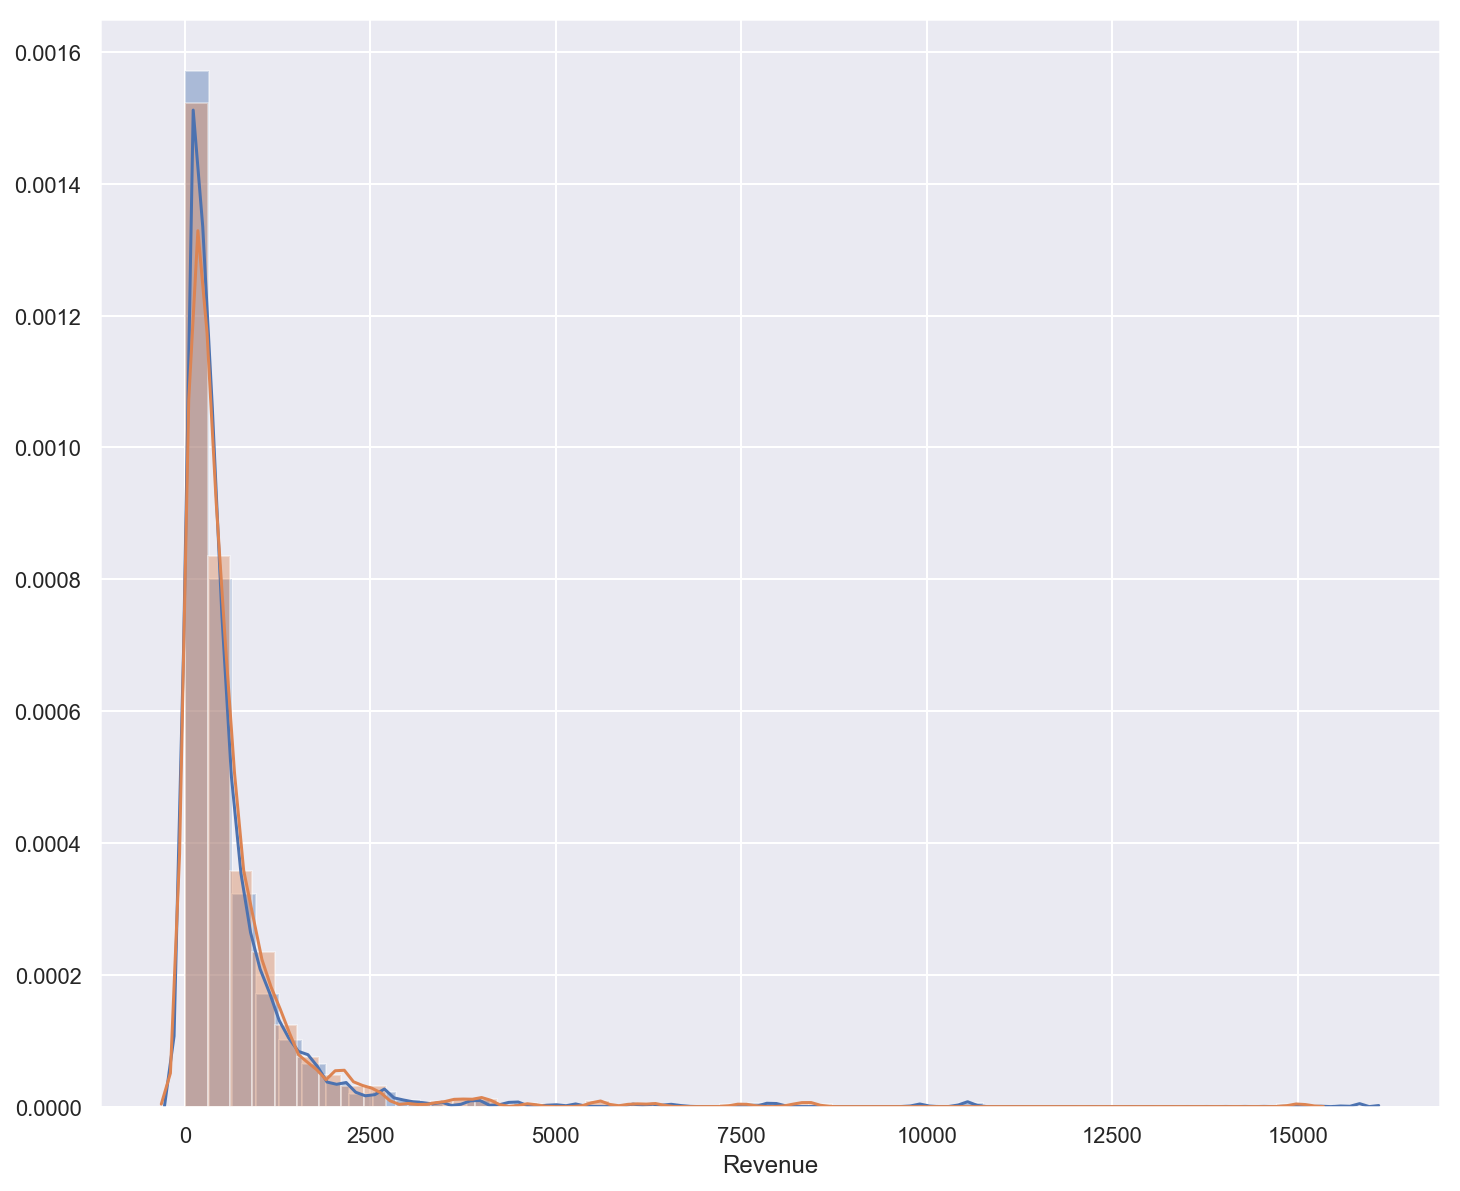

In [23]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(no_discount_df['Revenue']) #Blue
sns.distplot(discounted_df['Revenue']) #Red

In [24]:
print("Mean Difference - Revenue: ", discounted_df['Revenue'].mean() - no_discount_df['Revenue'].mean())

Mean Difference - Revenue:  44.66461933581968


In [25]:
t, p = ttest_ind(discounted_df['Revenue'], no_discount_df['Revenue'], equal_var=False)
print('T-Statisitc: ', t)
print('P-Value: ', p)

T-Statisitc:  1.0381255545690475
P-Value:  0.2993546075168257


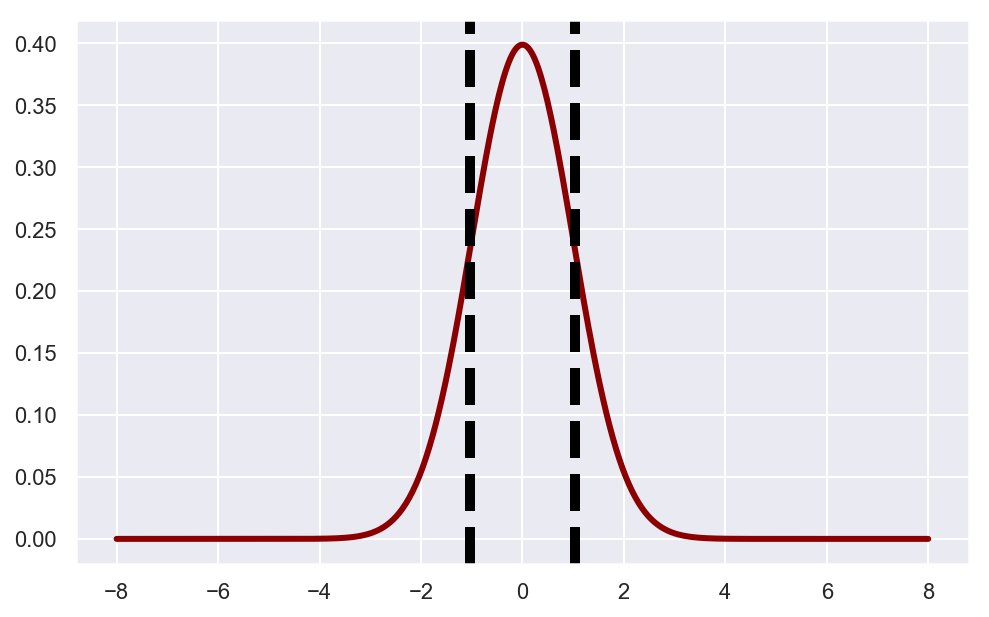

In [26]:
n_control = len(no_discount_df['Revenue'])
n_experimental = len(discounted_df['Revenue'])

visualize_t(t, n_control, n_experimental)

## Conclusion: Test 2 - Revenue

With a t-stat of 1.038 and a p-value > 0.05 we fail to reject our null hypothesis. On average revenue is higher when products are discounted, however not significantly so.

____

# Test 3 - High-end vs. Low-end Products: Revenue 

#### H0: The price of the product has no effect on revenue

#### H1: The price of the product has an effect on revenue 

In [28]:
median_price = np.median(df['UnitPrice'])
print("Median Price: ", median_price)

Median Price:  18.4


In [29]:
high_end = no_discount_df.loc[no_discount_df['UnitPrice'] > median_price]
high_end.head()

,Id,OrderID,ProductID,UnitPrice,Quantity,Discount,Revenue
2,10248/72,10248,72,34.8,5,0.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0
13,10252/60,10252,60,27.2,40,0.0,1088.0
23,10255/59,10255,59,44.0,30,0.0,1320.0


In [30]:
low_end = no_discount_df.loc[no_discount_df['UnitPrice'] < median_price]
low_end.head()

,Id,OrderID,ProductID,UnitPrice,Quantity,Discount,Revenue
0,10248/11,10248,11,14.0,12,0.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0
5,10250/41,10250,41,7.7,10,0.0,77.0
10,10251/65,10251,65,16.8,20,0.0,336.0
14,10253/31,10253,31,10.0,20,0.0,200.0


In [31]:
n_high_end = len(high_end)
n_low_end = len(low_end)

print("N High-end: ", n_high_end)
print("N Low-end: ", n_low_end)

N High-end:  657
N Low-end:  643


/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


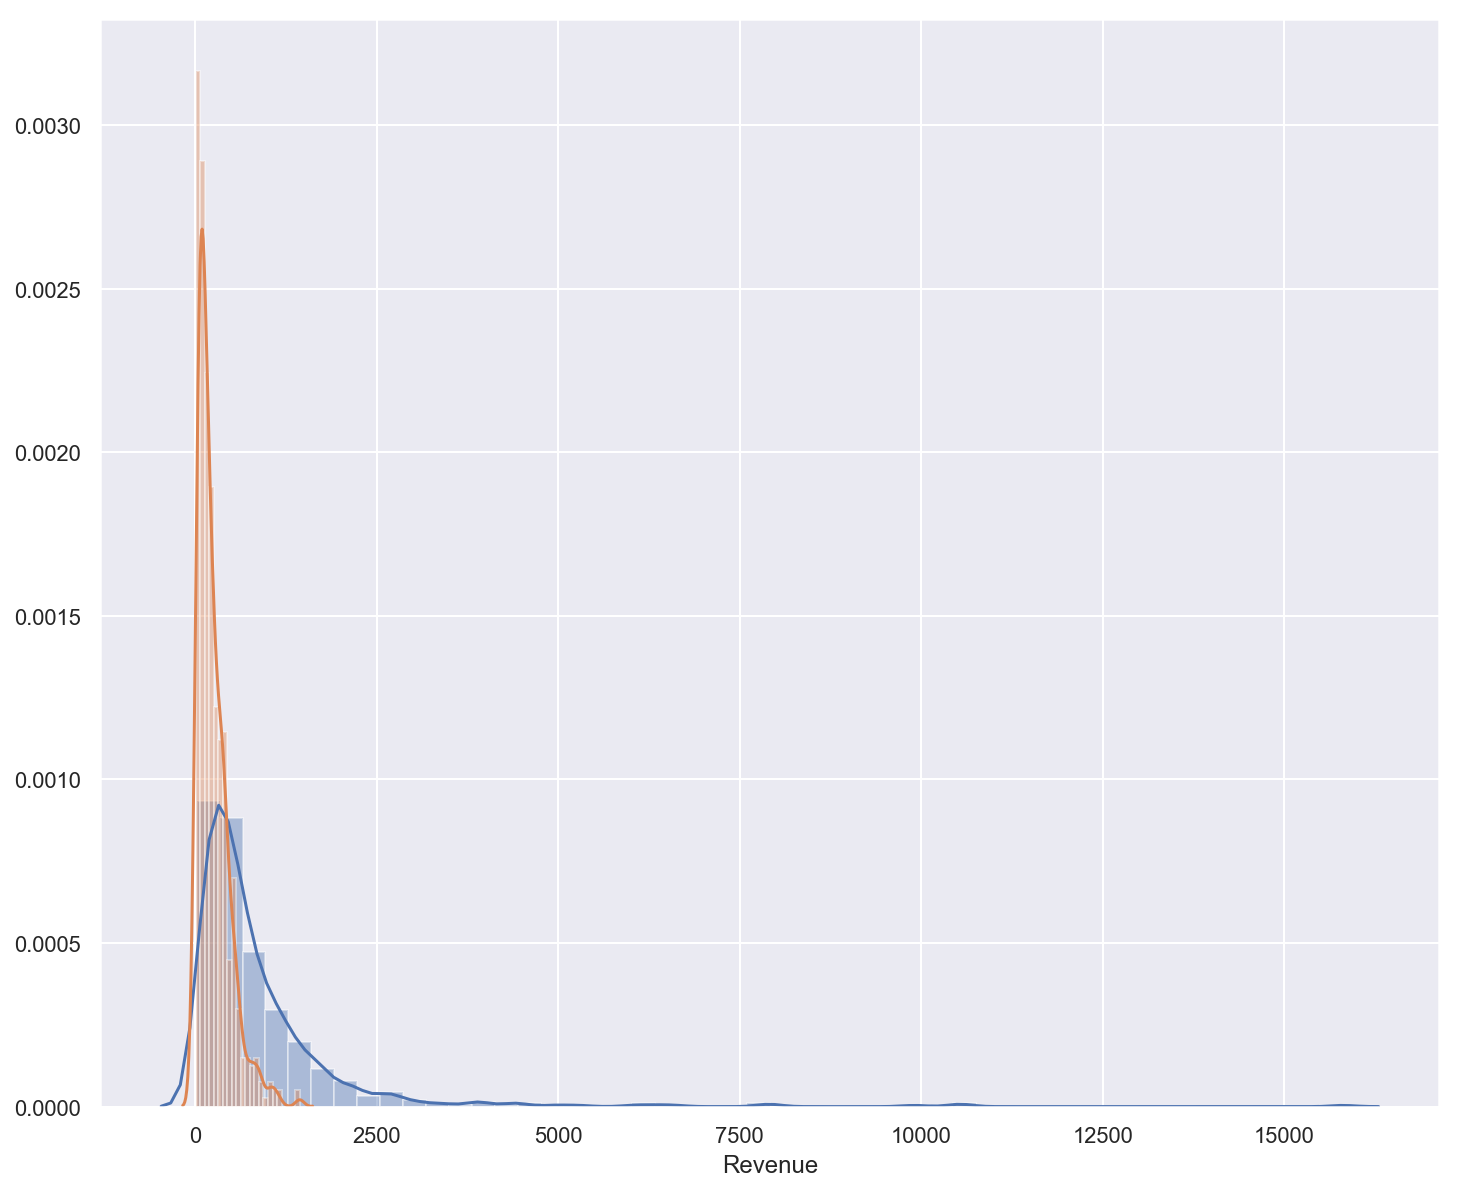

In [32]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(high_end['Revenue']) #Blue
sns.distplot(low_end['Revenue']) #Red

In [33]:
print("Mean Difference - Revenue: ", high_end['Revenue'].mean() - low_end['Revenue'].mean())

Mean Difference - Revenue:  643.3688849831103


In [34]:
t, p = ttest_ind(high_end['Revenue'], low_end['Revenue'], equal_var=False)
print('T-Statisitc: ', t)
print('P-Value: ', p)

T-Statisitc:  12.85440485550646
P-Value:  4.357074218368875e-34


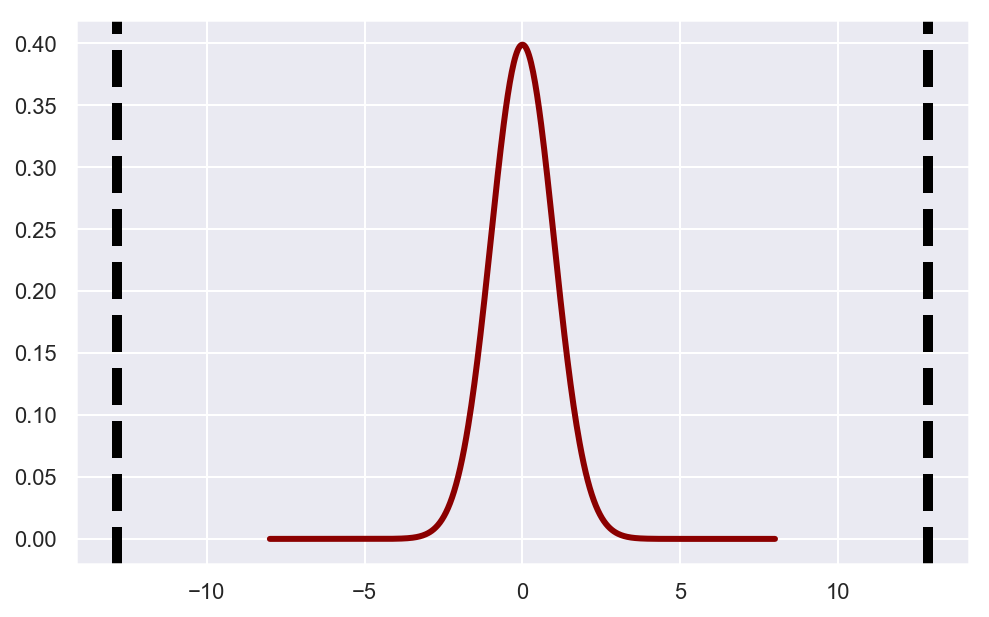

In [35]:
visualize_t(t, n_low_end, n_high_end)

## Conclusion

With a t-stat of 12.8 and a p-value of 4.4e-34 we can reject our null hypothesis and conclude that our higher-end products generate significantly different revenue than our lower-end products. Let's cut the data even more to see if we can find our magical price point It may be worth ending production on our low-end products and doubling down on our higher-end products.

_____

# Test 4 - Upper Q vs. Low-end Products: Revenue

In [36]:
upperq_price = no_discount_df['UnitPrice'].quantile(.75)
upperq_price

32.8

In [37]:
higher_end = no_discount_df.loc[no_discount_df['UnitPrice'] > upperq_price]
high_end.head()

,Id,OrderID,ProductID,UnitPrice,Quantity,Discount,Revenue
2,10248/72,10248,72,34.8,5,0.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0
13,10252/60,10252,60,27.2,40,0.0,1088.0
23,10255/59,10255,59,44.0,30,0.0,1320.0


In [38]:
lower_end = no_discount_df.loc[no_discount_df['UnitPrice'] < upperq_price]
lower_end.head()

,Id,OrderID,ProductID,UnitPrice,Quantity,Discount,Revenue
0,10248/11,10248,11,14.0,12,0.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0
3,10249/14,10249,14,18.6,9,0.0,167.4
5,10250/41,10250,41,7.7,10,0.0,77.0
10,10251/65,10251,65,16.8,20,0.0,336.0


In [39]:
n_higher_end = len(higher_end)
n_lower_end = len(lower_end)

print("N High-end: ", n_higher_end)
print("N Low-end: ", n_lower_end)

N High-end:  319
N Low-end:  986


/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


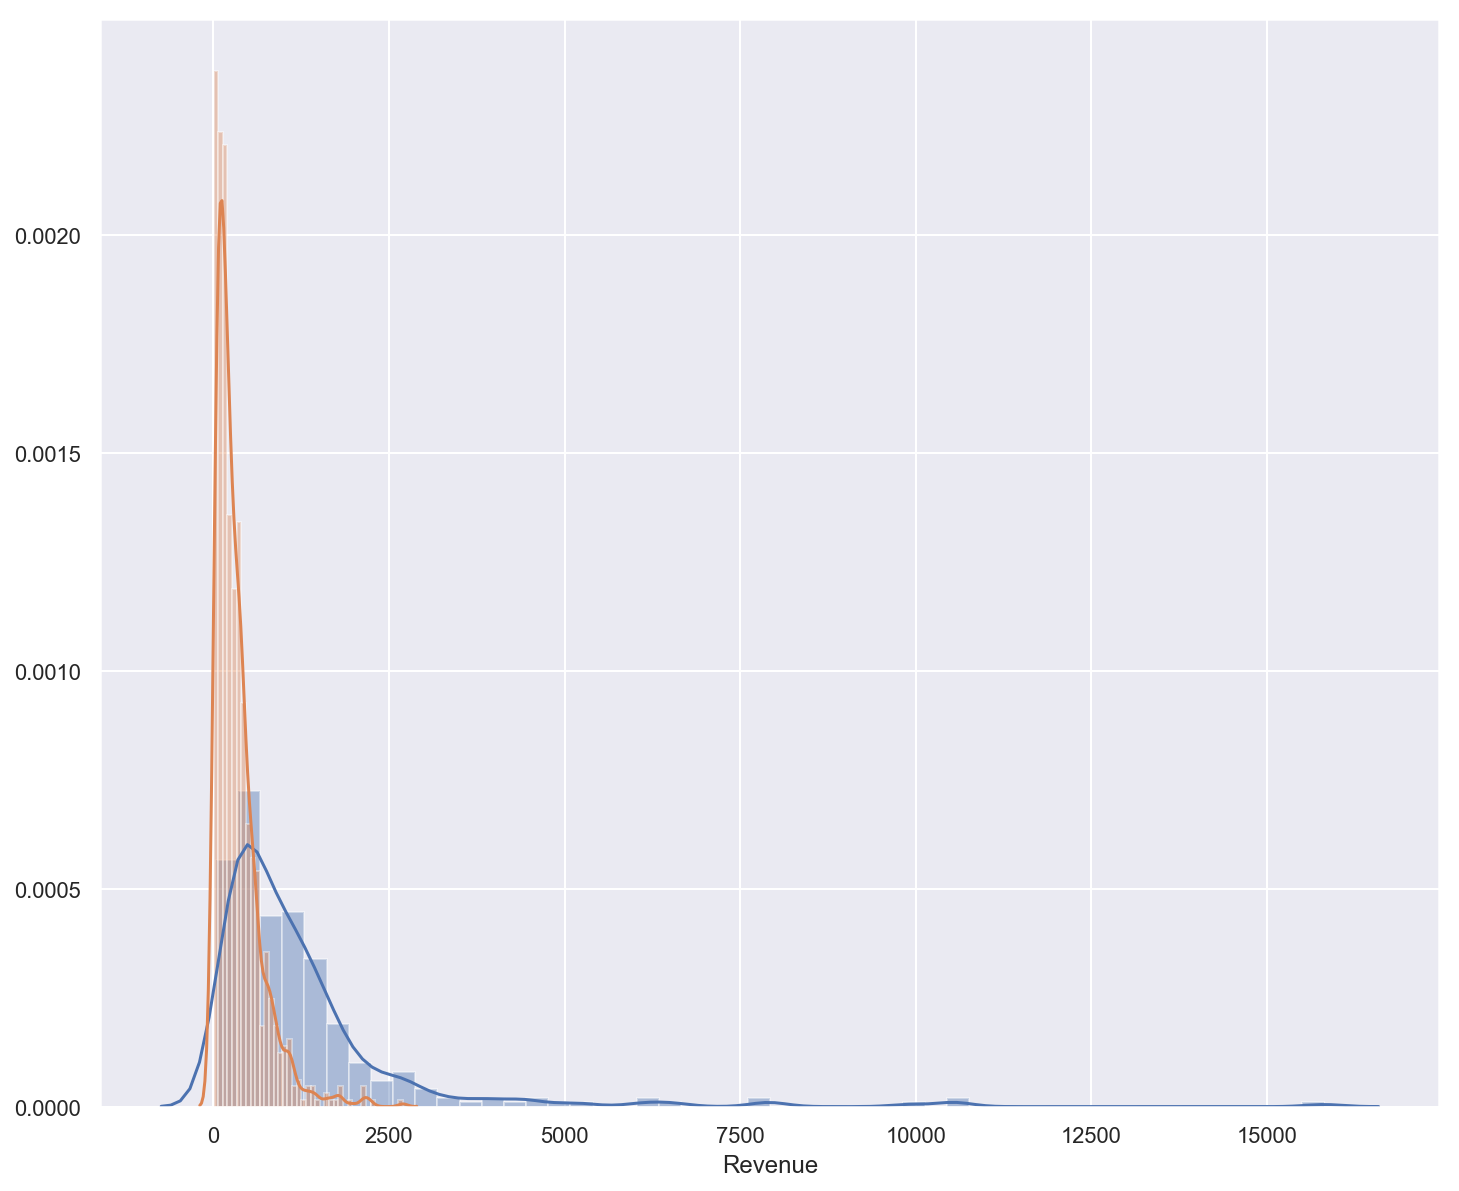

In [40]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(higher_end['Revenue']) #Blue
sns.distplot(lower_end['Revenue']) #Red

In [41]:
print("Mean Difference - Revenue: ", higher_end['Revenue'].mean() - lower_end['Revenue'].mean())

Mean Difference - Revenue:  945.0320200995757


In [42]:
t, p = ttest_ind(higher_end['Revenue'], lower_end['Revenue'], equal_var=False)
print('T-Statisitc: ', t)
print('P-Value: ', p)

T-Statisitc:  10.080907531462136
P-Value:  5.525860829700425e-21


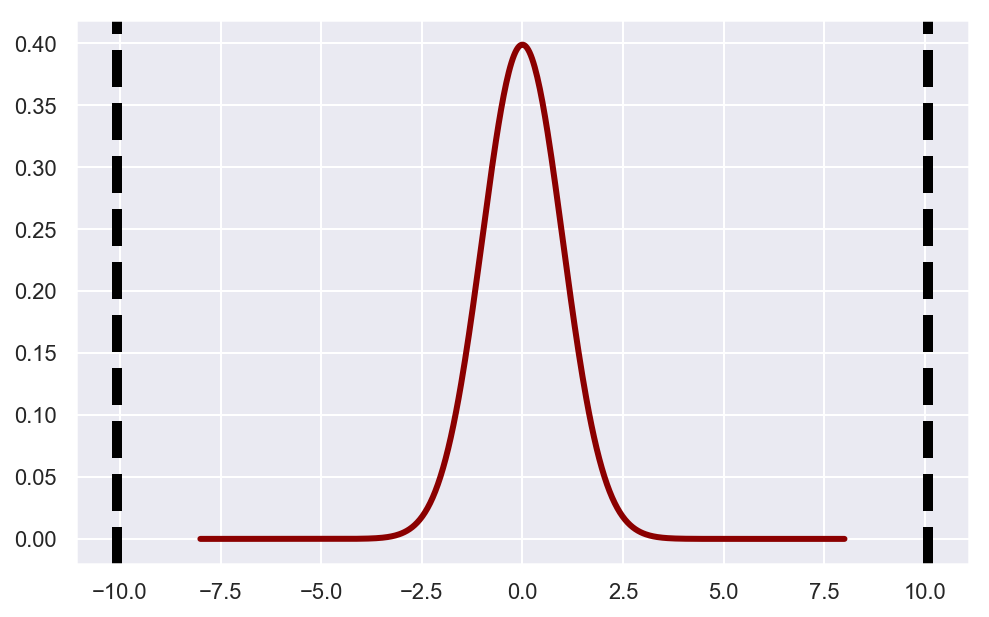

In [43]:
visualize_t(t, n_lower_end, n_higher_end)

# Conclusion

With a t-stat of 10 and a p-value of 5.5e-21 we can reject our null hypotheseis and state that the revenue genrated by the products priced at the upper quartile is significantly greater than that generated by the lower 3 quartiles.

___

# Additonal Notes

In [44]:
total_revenue = np.sum(no_discount_df['Revenue'])
high_end_revenue = np.sum(high_end['Revenue'])
low_end_revenue = np.sum(low_end['Revenue'])

high_end_percent_revenue = np.round((high_end_revenue / total_revenue) * 100, 2)
low_end_percent_revenue = np.round((low_end_revenue / total_revenue) * 100, 2)

print("High-End Percent Revenue: ", high_end_percent_revenue, "%")
print("Low-End Percent Revenue: ", low_end_percent_revenue, "%")

High-End Percent Revenue:  77.86 %
Low-End Percent Revenue:  21.09 %


In [45]:
total_revenue = np.sum(no_discount_df['Revenue'])
higher_end_revenue = np.sum(higher_end['Revenue'])
lower_end_revenue = np.sum(lower_end['Revenue'])

higher_end_percent_revenue = np.round((higher_end_revenue / total_revenue) * 100, 2)
lower_end_percent_revenue = np.round((lower_end_revenue / total_revenue) * 100, 2)

print("Higher-End Percent Revenue: ", higher_end_percent_revenue, "%")
print("Lower-End Percent Revenue: ", lower_end_percent_revenue, "%")

Higher-End Percent Revenue:  54.52 %
Lower-End Percent Revenue:  44.39 %
